In [15]:
import pickle
import pytz
import utils
import elasticsearch
import settings
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import glob
import sys
import os

In [6]:
avg_over_min = 1

In [71]:
knn = pickle.load(open('knn_pickle_file_sonycAQ', 'rb'))

In [47]:
en_date = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
st_date = '2022-06-16T00:00:00'

en_date_dt = datetime.strptime(en_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.timezone('America/New_York'))
st_date_dt = datetime.strptime(st_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.timezone('America/New_York'))

st_date_utc = datetime.strptime(st_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.UTC).strftime('%Y-%m-%dT%H:%M:%SZ')
en_date_utc = datetime.strptime(en_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.UTC).strftime('%Y-%m-%dT%H:%M:%SZ')

In [48]:
weather_station_url = 'https://www.wunderground.com/dashboard/pws/KNYNEWYO589'
with open('stations.txt', 'w')as fp:
    fp.write(weather_station_url)

filePath = glob.glob('*.csv')
for i in filePath:
    if os.path.exists(i):
        os.remove(i)
py_path = sys.executable
os.system(py_path + ' weather_scraper.py --st_date %s --en_date %s' % (st_date_dt.date(), en_date_dt.date()))

https://www.wunderground.com/dashboard/pws/KNYNEWYO589

** Initializing binary search to find the first date with data **
low is 0 - 2022-06-16
high is 15 - 2022-07-01
mid is 7 - 2022-06-23
----//----
low is 0 - 2022-06-16
high is 6 - 2022-06-22
mid is 3 - 2022-06-19
----//----
low is 0 - 2022-06-16
high is 2 - 2022-06-18
mid is 1 - 2022-06-17
----//----
low is 0 - 2022-06-16
high is 0 - 2022-06-16
mid is 0 - 2022-06-16
----//----

First date not found!
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-16/2022-06-16/daily
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! pro

0

range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty

In [49]:
df_weather = pd.read_csv(glob.glob('*.csv')[0])
df_weather['ts'] = pd.to_datetime(df_weather["Date"] + ' ' + df_weather['Time']).dt.tz_localize(tz='US/Eastern')
df_weather = df_weather.set_index('ts').resample('%iT' % avg_over_min).mean().fillna(method='ffill').fillna(method='bfill')
df_weather = df_weather.loc[st_date:en_date]
df_weather = df_weather.loc[st_date:en_date]
df_weather = df_weather[['Temperature_C', 'Humidity_%']]

278 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-20/2022-06-20/daily
Saving 285 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-21/2022-06-21/daily
Saving 284 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-22/2022-06-22/daily
Saving 272 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-23/2022-06-23/daily
Saving 282 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-24/2022-06-24/daily
Saving 285 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-25/2022-06-25/daily
Saving 287 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-26/2022-06-26/daily
Saving 277 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-27/2022-06-27/daily
list index out of range! probably caused by an empty row in the data
list index

In [51]:
df_weather

,Temperature_C,Humidity_%
ts,,
2022-06-16 00:04:00-04:00,19.61,80.0
2022-06-16 00:05:00-04:00,19.61,80.0
2022-06-16 00:06:00-04:00,19.61,80.0
2022-06-16 00:07:00-04:00,19.61,80.0
2022-06-16 00:08:00-04:00,19.61,80.0
...,...,...
2022-07-01 21:15:00-04:00,28.56,70.0
2022-07-01 21:16:00-04:00,28.56,70.0
2022-07-01 21:17:00-04:00,28.56,70.0


In [52]:
es = elasticsearch.Elasticsearch('https://es.master1.sonycproject.com', http_auth=('elastic', settings.es_password))

In [75]:
sensor_list = ['sonycnode-dca632ceb490', 'sonycnode-dca632ceb547', 'sonycnode-dca632ceb529', 'sonycnode-dca632ceb559', 'sonycnode-dca632ceb48d']


In [86]:
# sensor_list = ['sonycnode-dca632ceb490']
for fqdn in sensor_list:
    
    if os.path.exists('%s.csv' % fqdn):
        continue
    
    ss = utils.download_sensor_data(es, 'status', 'fqdn', fqdn, start=st_date_utc, end=en_date_utc, save=False)
    data = {}
    
    main_df = pd.DataFrame()
    for idx, ele in enumerate(ss):
        ts = pd.to_datetime(datetime.fromtimestamp(int(ele['aq']['dt']))).tz_localize(tz='US/Eastern')
        main_df.at[idx,'ts'] = ts
    data['ts'] = pd.to_datetime([datetime.fromtimestamp(int(ele['aq']['dt'])) for ele in ss if 'aq' in ele and 'dt' in ele]).tz_localize(tz='US/Eastern')
    print()
    data['laeq'] = [ele['laeq'] for ele in ss if 'laeq' in ele]
    data['lceq'] = [ele['lceq'] for ele in ss if 'lceq' in ele]
    data['lzeq'] = [ele['lzeq'] for ele in ss if 'lzeq' in ele]

    data['PM1.0'] = [ele['aq']['PM1.0'] for ele in ss if 'aq' in ele and 'PM1.0' in ele]
    data['PM2.5'] = [ele['aq']['PM2.5'] for ele in ss if 'aq' in ele and 'PM2.5' in ele]
    data['PM10'] = [ele['aq']['PM10'] for ele in ss if 'aq' in ele and 'PM10' in ele]

    data['engine'] = [ele['classification']['engine'] for ele in ss if 'classification' in ele]
    data['machinery_impact'] = [ele['classification']['machinery_impact'] for ele in ss if 'classification' in ele]
    data['non_machinery_impact'] = [ele['classification']['non_machinery_impact'] for ele in ss if 'classification' in ele]
    data['powered_saw'] = [ele['classification']['powered_saw'] for ele in ss if 'classification' in ele]
    data['human_voice'] = [ele['classification']['human_voice'] for ele in ss if 'classification' in ele]
    
    main_df = pd.DataFrame(data)
    main_df = main_df.set_index('ts').resample('%iT' % avg_over_min).mean()
    main_df = main_df[str(df_weather.index[0]):str(df_weather.index[-1])]
    
    main_df[['temp_c', 'rel_humid']] = df_weather[['Temperature_C', 'Humidity_%']]
    
    main_df = main_df.fillna(method='ffill').fillna(method='bfill')
    
    knn_input_df = main_df[['PM2.5', 'temp_c', 'rel_humid']].rename(columns={'PM2.5': 'Sensor_O1', 'temp_c': 'Temp', 'rel_humid': 'RelHum'})
    main_df['PM2.5_adj'] = knn.predict(knn_input_df)
    main_df.round(4).to_csv('%s.csv' % fqdn) 
    

{'query': {'bool': {'must': [{'term': {'fqdn.keyword': 'sonycnode-dca632ceb559'}}, {'range': {'time': {'gte': '2022-06-16T04:00:00Z', 'lte': '2022-07-02T01:20:14Z'}}}]}}}


0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T13:36:09.766275 - 2022-06-20T21:13:26.175203
1. n hits: 1000. 2022-06-20T19:55:05.150748 - 2022-06-21T04:05:16.387774
2. n hits: 1000. 2022-06-21T02:42:45.287089 - 2022-06-21T05:18:22.331869
3. n hits: 1000. 2022-06-21T04:05:41.367260 - 2022-06-21T11:59:37.311762
4. n hits: 1000. 2022-06-21T05:18:37.311545 - 2022-06-21T13:08:08.099065
5. n hits: 1000. 2022-06-21T05:18:32.361303 - 2022-06-21T14:44:34.337121
6. n hits: 1000. 2022-06-21T06:26:03.211120 - 2022-06-21T14:44:59.338355
7. n hits: 1000. 2022-06-21T06:34:48.227993 - 2022-06-21T17:28:11.366539
8. n hits: 1000. 2022-06-21T16:20:10.540632 - 2022-06-21T23:46:36.068191
9. n hits: 1000. 2022-06-20T14:13:00.827865 - 2022-06-21T23:45:21.096796
10. n hits: 1000. 2022-06-20T21:13:31.175789 - 2022-06-20T23:23:42.772588
11. n hits: 1000. 2022-06-20T15:22:56.738298 - 2022-06-20T23:23:52.698004
12. n hits: 1000. 2022-06-20T15:24:11.778833 - 2022-06-21T00:18:28.481285
13. n hits: 1000. 2022-06-20T16:25:12.495322 - 2

111. n hits: 1000. 2022-06-26T17:47:15.488667 - 2022-06-26T19:56:02.177362
112. n hits: 1000. 2022-06-26T13:16:36.851798 - 2022-06-26T20:58:32.931061
113. n hits: 1000. 2022-06-26T20:24:32.507349 - 2022-06-27T13:46:41.333302
114. n hits: 1000. 2022-06-27T12:50:40.637214 - 2022-06-27T15:58:12.995772
115. n hits: 1000. 2022-06-27T14:59:02.328059 - 2022-06-27T16:55:58.743191
116. n hits: 1000. 2022-06-27T16:01:43.044933 - 2022-06-27T18:23:25.112608
117. n hits: 1000. 2022-06-27T17:43:59.563692 - 2022-06-27T19:30:56.016631
118. n hits: 1000. 2022-06-26T23:42:10.087370 - 2022-06-27T20:06:01.476884
119. n hits: 1000. 2022-06-26T06:03:21.084385 - 2022-06-27T04:18:18.804874
120. n hits: 1000. 2022-06-27T00:44:45.998560 - 2022-06-27T04:35:14.022725
121. n hits: 1000. 2022-06-27T01:40:31.724150 - 2022-06-27T04:42:54.104134
122. n hits: 1000. 2022-06-26T20:58:38.024199 - 2022-06-27T05:06:54.439678
123. n hits: 1000. 2022-06-25T17:26:50.941994 - 2022-06-27T05:43:44.925169
124. n hits: 1000. 2022-0

ValueError: All arrays must be of the same length

In [ ]:
main_df = pd.DataFrame()
for idx, ele in enumerate(ss):
    ts = pd.to_datetime(datetime.fromtimestamp(int(ele['aq']['dt']))).tz_localize(tz='US/Eastern')
    if not ts:
        continue
    main_df.at[idx,'ts'] = ts

In [ ]:
main_df

<AxesSubplot:xlabel='ts'>

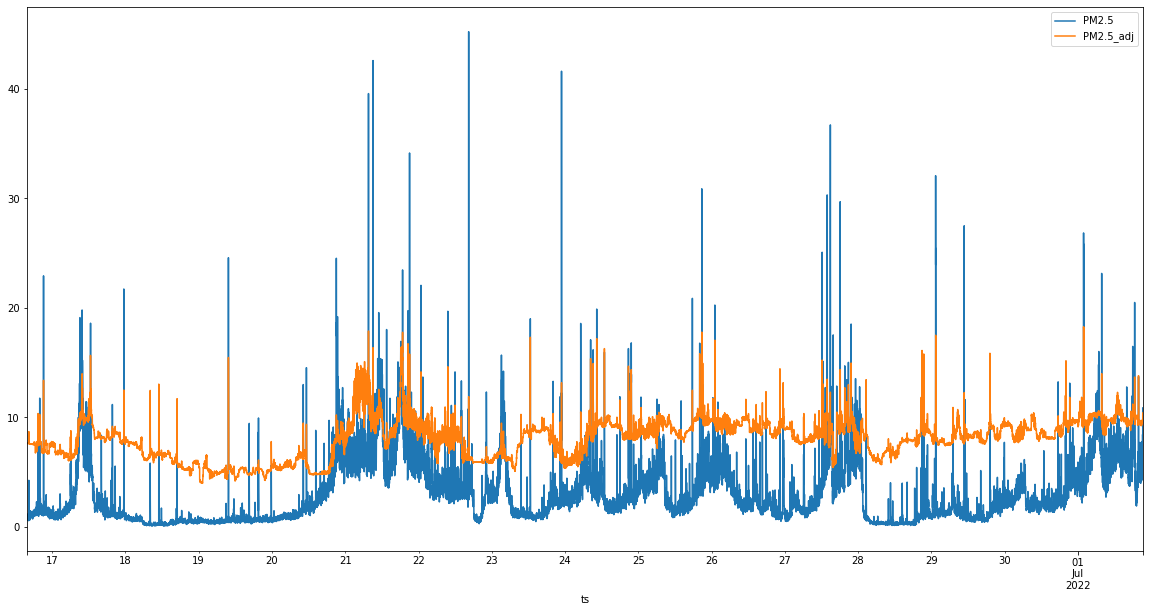

In [73]:
main_df[['PM2.5', 'PM2.5_adj']].plot(figsize=(20, 10))